#Understanding credit risk

Three primary components
1. PD - Probability of Default
Likelihood someone will default on loan
2. Exposure at Default (EAD)
Amt outstanding at default
3. LGD - Loss Given Default
Ratio of exposure against any recovery from loss

Expected loss = PD(*)EAD(*)LGD

In [3]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving cr_loan2.csv to cr_loan2.csv


In [70]:
import pandas as pd
cr_loan = pd.read_csv('cr_loan2.csv')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [71]:
# Check the structure
print(cr_loan.dtypes)

# Check the first five rows
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  ...  cb_person_cred_hist_length
0          22  ...                           3
1          21  ...                           2
2          25  ...                           3
3          23  ...                           2
4          24  ...                           4

[5 rows x 12 columns]


In [72]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


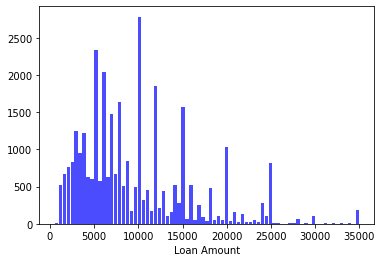

In [73]:
import matplotlib.pyplot as plt
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


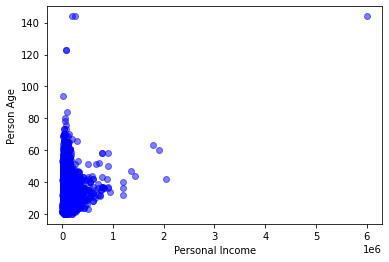

In [74]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

We can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.

In [75]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))  #crosstab shows loan_intent, grouped by loan_Status..

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


1 - Default
0- No default, so with cross tab you get to see
how medical loans are most defaulted and then debt consolidation.

In [76]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                        ...    1                   
loan_grade                A     B     C    D    E  ...    C     D    E   F   G
person_home_ownership                              ...                        
MORTGAGE               5219  3729  1934  658  178  ...  321   553  161  61  31
OTHER                    23    29    11    9    2  ...    6    11    6   2   0
OWN                     860   770   464  264   26  ...   31    18   31   8   5
RENT                   3602  4222  2710  554  137  ...  981  1559  423  99  27

[4 rows x 14 columns]


In [77]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
                  values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


For how to use crosstab, read this link. Very imp.

https://pbpython.com/pandas-crosstab.html

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


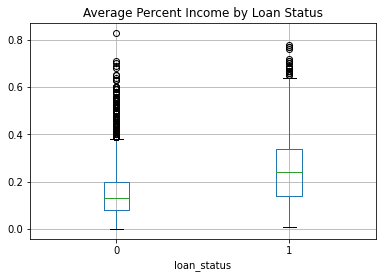

In [78]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

Finding outliers with cross tables

In [79]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


^ see how aggfunc used here is max, to show the max value. It gives an idea if there's any outlier value or not

In [80]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

In [81]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [82]:
#All together

# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
try:
  print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))
except KeyError:
  pass

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


^ was getting an issue here, so used the keyerror thing, try except loop. Find info here - https://github.com/pandas-dev/pandas/issues/10291

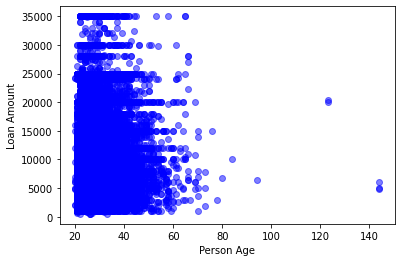

In [83]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

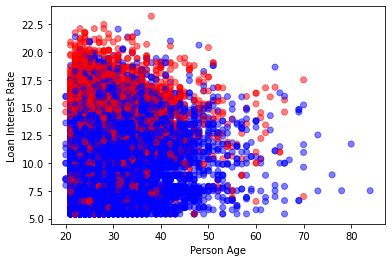

In [84]:
import matplotlib
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],  
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)

plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Replacing missing credit data

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  ...  cb_person_cred_hist_length
105          22  ...                           4
222          24  ...                           2
379          24  ...                           3
407          25  ...                           2
408          22  ...                           3

[5 rows x 12 columns]


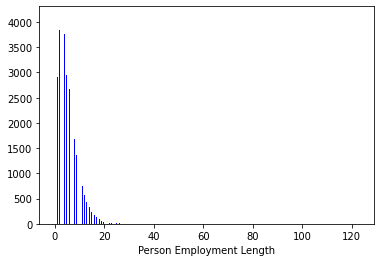

In [85]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

Above we saw , person_emp_length and loan_int_rate had missing values, we filled in person_emp_length but we should not assume and rather drop missing ones in int rate.

In [86]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


In [87]:
#recheck
print(cr_loan_clean.isnull().any().sum())

print(cr_loan_clean.columns.isnull().sum())

0
0


In [88]:
# Count the number of records for each unique value
cr_loan_clean['person_home_ownership'].value_counts()

RENT        14893
MORTGAGE    12122
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

#Logistic regression for probability of default

Let us work with this new and all combined data now, ie. cr_loan_clean

Earlier in scatter plot we saw more red points, meaning more defaults happen at high interest rates, so let us build logistic regression just with that one factor for now.

In [89]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]                       #feature
y = cr_loan_clean[['loan_status']]                          #label to predict



# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')         #created an instance of model, solver is same as we have in excel, lbfgs is default
clf_logistic_single.fit(X, np.ravel(y))                               #fit on x, and y. we used np.ravel to have y as a one dimensional array, and not have it as a df.

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]


In [90]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))   #But I still prefer using the other approach better

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


#So just using X, Y we get an intercept. Doesn't share much.
But running it on train, test split for x and y will tell us more, and do prediction and forecasting.

The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.

We know that the data should be separated into training and test sets. test_train_split() is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

In addition to the intercept_, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default.

In [91]:
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


The more positive the coefficient value, the more it predicts defaults.
Hence loan interest rate predicts default in the highest way possible of all 3 data features we chose

for one percent point increase in loan_int_rate , the probability of default increases by 8.3% points

#One-hot encoding credit data

In [92]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)   #Use get dummies to one hot encode

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)     #so column wise operation, i.e concatenation


# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


What makes more sense to me is to say it this way:

Axis 0 will act on all the ROWS in each COLUMN

Axis 1 will act on all the COLUMNS in each ROW

So a mean on axis 0 will be the mean of all the rows in each column, and a mean on axis 1 will be a mean of all the columns in each row.

In [93]:
print(cred_num.head())
print(cred_str.head())
print(cr_loan_prep.head())

   person_age  person_income  ...  loan_percent_income  cb_person_cred_hist_length
0          22          59000  ...                 0.59                           3
1          21           9600  ...                 0.10                           2
2          25           9600  ...                 0.57                           3
3          23          65500  ...                 0.53                           2
4          24          54400  ...                 0.55                           4

[5 rows x 8 columns]
  person_home_ownership loan_intent loan_grade cb_person_default_on_file
0                  RENT    PERSONAL          D                         Y
1                   OWN   EDUCATION          B                         N
2              MORTGAGE     MEDICAL          C                         N
3                  RENT     MEDICAL          C                         N
4                  RENT     MEDICAL          C                         Y
   person_age  ...  cb_person_default_on_f

In [94]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)        #so to see probabilities of prediction on test data,once model has learned from train data


#print(preds.head()) - this code won't work as preds is a numpy array that is returned to us.
#so convert to dataframe first.

# Create dataframes of first five predictions, and first five true labels
preds1 = pd.DataFrame(preds)
print(preds1.head()) 

#so it has prob of both non-default (0) and prob of non-default (1).

preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])   #take all rows, and first column and from this selection, take first 5 rows and name this as prob_default column
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

#If you set drop = True , reset_index will delete the index instead of inserting it back into the columns of the DataFrame. 
#If you set drop = True , the current index will be deleted entirely and the numeric index will replace it.

          0         1
0  0.796405  0.203595
1  0.862599  0.137401
2  0.880378  0.119622
3  0.692560  0.307440
4  0.494215  0.505785
   loan_status  prob_default
0            0      0.203595
1            0      0.137401
2            0      0.119622
3            0      0.307440
4            0      0.505785


Let us run some classification reports to check our model's performance

In [95]:
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

log_preds_df = preds_df


#As all probs are in 0 to 1, we need to call them default or not or 0 or 1 to simply measure them up to y_test.

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))     #as values are as 0,1 in inputs of classification, we enter target_names in same order

0    10861
1      925
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786



The recall for defaults is 0.22 meaning 22% of our true defaults were predicted correctly.

Recall is the number of relevant documents retrieved by a search divided by the total number of existing relevant documents, while precision is the number of relevant documents retrieved by a search divided by the total number of documents retrieved by that search.

So precision is how precise you were , out of all you predicted how many are precisely correct.
Recall is out of whole relevant ones, how many did you manage to predict.

The classification_report() has many different metrics within it, but you may not always want to print out the full report. Sometimes you just want specific values to compare models or use for other purposes.

There is a function within scikit-learn that pulls out the values for you. That function is precision_recall_fscore_support() and it takes in the same parameters as classification_report.

It is imported and used like this:

`Import function
from sklearn.metrics import precision_recall_fscore_support
`Select all non-averaged values from the report
precision_recall_fscore_support(y_true,predicted_values)

In [96]:
from sklearn.metrics import precision_recall_fscore_support

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])




              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786

(array([0.81447381, 0.62378378]), array([0.96214923, 0.22260802]), array([0.88217402, 0.32812056]), array([9194, 2592]))
[0.81447381 0.62378378]


0.7995078907178008


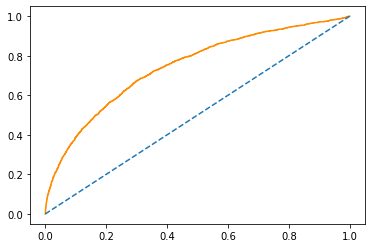

0.7437090992313827


In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)            #fallout, sensitivity is just a way of saying precision and recall
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default) 

print(auc)


#what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).#                                      #roc is plotted bw labels, i.e y_test and prob_default or probabilities predicted

In [98]:
from sklearn.metrics import confusion_matrix
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8846  348]
 [2015  577]]
[[8074 1120]
 [1477 1115]]


format of confusion matrix looks like , 
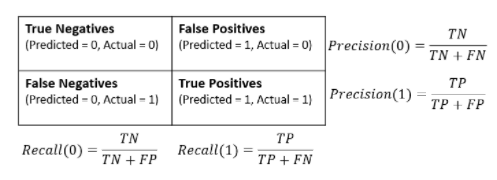

#which threshold gives us the highest value for default recall?

Answer is recall for default is 4th cell, and highest with prob threshold of 0.4

In [99]:
avg_loan_amnt = cr_loan_prep['loan_amnt'].mean()

# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

12206848.964421853


^ wow, a brilliant code up above

first line - set threshold to 0.4 and change values to 1 for default and 0 for non.

second- count values of 0s and 1s, and save 1s in num_defaults, it gives how many cases default happened

third- after running this precision_recall_f_support code, choose the 4th element or [1] row, [1] column.

Fourth and the most imp-

number of default * avg loan amt gives us how much we defaulted = a
but a multiplied by (1-default_recall), where (1-default recall) gives us what percentage we didn't correctly see as default, or how many defaults did we miss

so a *(1-default_recall) gives amount that can go default, that our model didn't predict.

By our estimates, this loss would be around $12 million.

~Threshold selection

You know there is a trade off between metrics like default recall, non-default recall, and model accuracy. One easy way to approximate a good starting threshold value is to look at a plot of all three using matplotlib. With this graph, you can see how each of these metrics look as you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

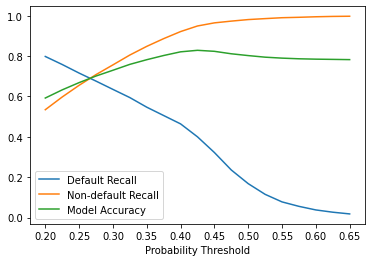

In [100]:
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65]
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
def_recalls = [0.7981438515081206, 0.7583139984532096, 0.7157772621809745, 0.6759474091260634, 0.6349574632637278, 0.594354215003867, 0.5467904098994586, 0.5054137664346481,
 0.46403712296983757, 0.39984532095901004, 0.32211910286156226, 0.2354988399071926, 0.16782675947409126, 0.1148491879350348, 0.07733952049497293, 0.05529775715390565,
 0.03750966744006187, 0.026295436968290797, 0.017788089713843776]
nondef_recalls = [0.5342465753424658, 0.5973037616873234, 0.6552511415525114, 0.708306153511633, 0.756468797564688, 0.8052837573385518, 0.8482278756251359, 0.8864970645792564,
 0.9215046749293324, 0.9492280930637095, 0.9646662317895195, 0.9733637747336378, 0.9809741248097412, 0.9857577734290063, 0.9902152641878669, 0.992280930637095, 0.9948901935203305,
 0.9966297021091541, 0.997499456403566]

accs = [0.5921588594704684, 0.6326374745417516, 0.6685336048879837, 0.7012050237610319, 0.7298031228784793, 0.7589952477936185, 0.7820773930753564, 0.8028682959945689,
 0.8211133740665308, 0.8286659877800407, 0.8236591989137814, 0.811439239646979, 0.8025288526816021, 0.7946367956551256, 0.7898845892735913, 0.7866598778004074, 0.7847929395790902,
 0.7836897488119484, 0.7825016972165648]



plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

2.75 it's the point where all three lines converge. This threshold would make a great starting point, but declaring all loans about 0.275 to be a default is probably not practical. But it would maximize these scores evenly

#Gradient boosted trees with XGBoost


In [101]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

print(true_df)

#as you see loan status already has an index column with random numbers, they are needed to be replaced by 0,1,2,3. hence we do reset_index

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

       loan_status
30015            0
22648            0
9634             0
3455             0
16426            0
   loan_status  prob_default
0            0      0.125217
1            0      0.138303
2            0      0.024192
3            0      0.163811
4            0      0.402502


Now, a random portfolio withprob. of default from both the models, loss given default = 20%, and loan amount, i.e. the exposure at default is created,

^ This data is not with us, it is in Datacamp's env only. but it looks like this.

print(portfolio.head())

   gbt_prob_default  lr_prob_default  lgd  loan_amnt
0          0.940435         0.445779  0.2      15000
1          0.922014         0.223447  0.2      11200
2          0.021707         0.288558  0.2      15000
3          0.026483         0.169358  0.2      10800
4          0.064803         0.114182  0.2       3000

In [102]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula

#remember, expected loss = PD*EAD*LGD

portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

NameError: ignored

Output:

LR expected loss:  5596776.979852879;

GBT expected loss:  5447712.9423716515

So, as we want the expected loss to be lower, Gradient boost method shows us what we want to see for now. Not neccesarily accurate.

Assessing gradient boosted trees

So you've now used XGBClassifier() models to predict probability of default using predict_proba. But these models can also use the .predict() method for creating predictions that give the actual class for loan_status.

You should check the model's initial performance by looking at the metrics from the classification_report(). 

In [103]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

preds_df_gbt = pd.DataFrame(gbt_preds)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))   # so, classification report(actual, predicted, name them/label as nd-0, d-1)

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.85      0.96      0.90      9194
     Default       0.76      0.40      0.52      2592

    accuracy                           0.84     11786
   macro avg       0.80      0.68      0.71     11786
weighted avg       0.83      0.84      0.82     11786



It is showing better results than earlier one.
Almost all Non-defaults predicted correctly.

Column importances

{'loan_percent_income': 62, 'loan_int_rate': 110, 'person_income': 123, 'person_emp_length': 23, 'person_home_ownership_RENT': 51, 'loan_grade_C': 9, 'loan_intent_DEBTCONSOLIDATION': 26, 'loan_grade_D': 33, 'loan_intent_MEDICAL': 28, 'person_home_ownership_OWN': 42, 'loan_intent_HOMEIMPROVEMENT': 25, 'loan_intent_VENTURE': 20, 'loan_grade_E': 17, 'loan_intent_EDUCATION': 6, 'cb_person_cred_hist_length': 1, 'person_home_ownership_OTHER': 4, 'loan_grade_G': 14, 'loan_amnt': 9, 'cb_person_default_on_file_N': 1, 'person_home_ownership_MORTGAGE': 2, 'person_age': 4, 'loan_grade_F': 1}


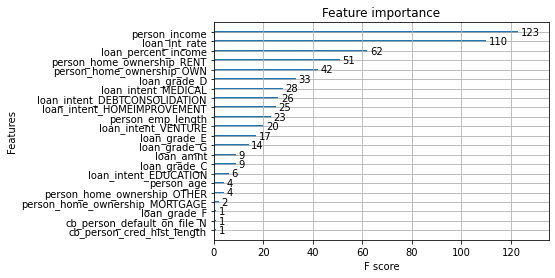

In [104]:
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = cr_loan_prep.drop(columns=['loan_status'])
#X = cr_loan_clean.drop(['loan_status'], axis = 1) #Can use wither of two, axis = 1 specifies we want to drop col wise.
y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)


# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

Now you can create multiple training sets,keeping only few columns at a time..
Foll code is just pseudo code to drive home the idea that how to do that. Define new X_trains and run on them, and get classfication report to see F1 score to see how both accuracy and recall are affected.
A high F1 score for default will show both precision and recall are correct.

In [105]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 62, 'loan_int_rate': 110, 'person_income': 123, 'person_emp_length': 23, 'person_home_ownership_RENT': 51, 'loan_grade_C': 9, 'loan_intent_DEBTCONSOLIDATION': 26, 'loan_grade_D': 33, 'loan_intent_MEDICAL': 28, 'person_home_ownership_OWN': 42, 'loan_intent_HOMEIMPROVEMENT': 25, 'loan_intent_VENTURE': 20, 'loan_grade_E': 17, 'loan_intent_EDUCATION': 6, 'cb_person_cred_hist_length': 1, 'person_home_ownership_OTHER': 4, 'loan_grade_G': 14, 'loan_amnt': 9, 'cb_person_default_on_file_N': 1, 'person_home_ownership_MORTGAGE': 2, 'person_age': 4, 'loan_grade_F': 1}


In [ ]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [ ]:
# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X2_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

#Cross validating credit models

Quite imp

First we see the difficult way, then we do the easy way.

In [106]:
#First way

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10              #It is a number when we stop our iterations. Because after a while, the performance starts to saturate and not improve further

params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}   #params has to be a dictionary, with objective - binary logistic, i.e 
#predict if default or not defaulted (1/0). seed we know to reproduce. eval_metric is increase the area under curve.


# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)          #DMatrix is a way of creating a data matrix that can be k-folded
# Create the data frame of cross validations


cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,          #xgb.cv is the key code here, rest are just parameters passed
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.895947       0.002251       0.891604      0.009428
1        0.902931       0.003206       0.897648      0.008133
2        0.911380       0.001820       0.905553      0.007240
3        0.915385       0.000750       0.908138      0.008153
4        0.920330       0.001100       0.912328      0.006981


^ so we see that as we go from 1st set of fold -train and 1st test to 2nd..that is one iteration.
And the performace is increasing if train/test-auc-mean is increasing. Std similarily should decrease

you see how the AUC for both train-auc-mean and test-auc-mean improves at each iteration of cross-validation? As the iterations progress the scores get better, but will they eventually reach 1.0?

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.896007       0.002084       0.891142      0.013071
1        0.903197       0.001911       0.897610      0.011157
2        0.911369       0.001791       0.904430      0.011304
3        0.915447       0.001476       0.907551      0.010186
4        0.920176       0.001249       0.911863      0.009559
0.9433009021666663


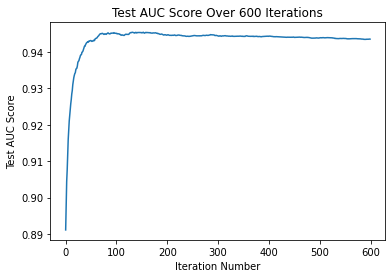

In [107]:
import matplotlib.pyplot as plt

cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)

# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']))  #.round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

Notice that the test AUC score never quite reaches 1.0 and begins to decrease slightly after 100 iterations. This is because this much cross-validation can actually cause the model to become overfit. 

#Second way to cross-validate, much easier

It combines the above huge code in just 1-2 lines

In [108]:
from sklearn.model_selection import cross_val_score
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)             #specify instance of model with hyperparameters

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)          #to get the cv_results , unlike above-simply use cross_val_score. gives us everything we need.

                                                                          # pass in the model, X and y, and specify how many folds, so cv= cross val folds = 4
# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.93574661 0.92986425 0.93506787 0.92984838]
Average accuracy: 0.93 (+/- 0.01)


#How to resolve class imbalance
Ofcourse, a non-default classified as default is less damaging than a default classified as non-default

1. Get more data
2. Custom loss function
3. Resample data

Let us try resampling data

In [109]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1) #combined our data, as we want all train data to be resampled.


count_nondefault, count_default = X_y_train['loan_status'].value_counts()

# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)     #If out of 100 samples, there are 20 defaults, in our new data set, we want only 20 non-defaults then. This is resampling

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)            #concat these 2 again, ie total all defaults and non defaults = count of defaults

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3872
0    3872
Name: loan_status, dtype: int64


Now, our training set has an even number of defaults and non-defaults. Let's test out some machine learning models on this new undersampled data set and compare their performance to the models trained on the regular data set.

In [110]:
# Train a model on the old data
gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))


#Create train_test_split on the NEW data

X_under = X_y_train_under.drop(['loan_status'], axis = 1)
y_under = X_y_train_under['loan_status']

# Use test_train_split to create the NEW training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=.4, random_state=123)

#Another model instantiated
gbt2 = xgb.XGBClassifier().fit(X_train_under, np.ravel(y_train_under))

# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X_test_under)

# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test_under, gbt2_preds, target_names=target_names))


              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9194
     Default       0.95      0.70      0.81      2592

    accuracy                           0.93     11786
   macro avg       0.94      0.85      0.88     11786
weighted avg       0.93      0.93      0.92     11786

              precision    recall  f1-score   support

 Non-Default       0.79      0.90      0.84      1563
     Default       0.88      0.76      0.81      1535

    accuracy                           0.83      3098
   macro avg       0.84      0.83      0.83      3098
weighted avg       0.84      0.83      0.83      3098



^Notice how recall for defaults has improved.

In [111]:
print(gbt2_preds)

[1 0 0 ... 1 0 0]


In [112]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test_under,gbt2_preds))

[[9107   87]
 [ 772 1820]]
[[1404  159]
 [ 370 1165]]


In [113]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test_under, gbt2_preds))

0.8463489003832343
0.8286151037531182


but looking at [1][1] element in confusion matrix , which is true positives or recall, leads us to believe undersampling didn't work well. 
and also, for auc score, it reduced for undersampling, :/

It is not what we expected , but hey, that's real life.
Not Datacamp, where they change data to show you what you were expecting :)!

#model-evaluation-and-implementation

Comparing model reports

You've used logistic regression models and gradient boosted trees. It's time to compare these two to see which model will be used to make the final predictions.

One of the easiest first steps for comparing different models' ability to predict the probability of default is to look at their metrics from the classification_report(). With this, you can see many different scoring metrics side-by-side for each model. Because the data and models are normally unbalanced with few defaults, focus on the metrics for defaults for now.

In [114]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names)) #this is predicted loan status by LR

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))  ##this is predicted loan status by GBT

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

NameError: ignored

<script.py> output:

                  precision    recall  f1-score   support
    
     Non-Default       0.86      0.92      0.89      9198
         Default       0.62      0.46      0.53      2586
    
       micro avg       0.82      0.82      0.82     11784
       macro avg       0.74      0.69      0.71     11784
    weighted avg       0.81      0.82      0.81     11784
    
                  precision    recall  f1-score   support
    
     Non-Default       0.93      0.99      0.96      9198
         Default       0.94      0.73      0.82      2586
    
       micro avg       0.93      0.93      0.93     11784
       macro avg       0.93      0.86      0.89     11784
    weighted avg       0.93      0.93      0.93     11784
    
    0.7108943782814463
    0.8909014142736051

Do you see that the scores from the classification_report() are all higher for the gradient boosted tree? This means the tree model is better in all of these aspects. Let's check the ROC curve.

The lift is how far the curve is from the random prediction. The AUC is the area between the curve and the random prediction. The model with more lift, and a higher AUC, is the one that's better at making predictions accurately.

In [ ]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [ ]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

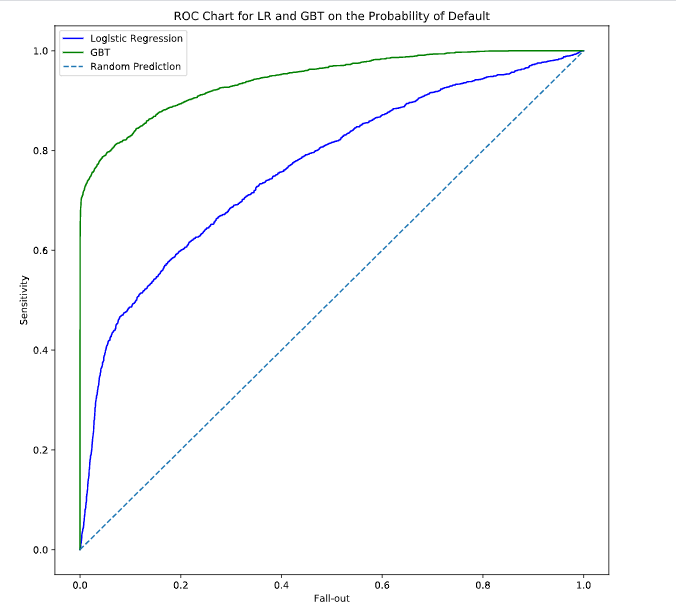

In [ ]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

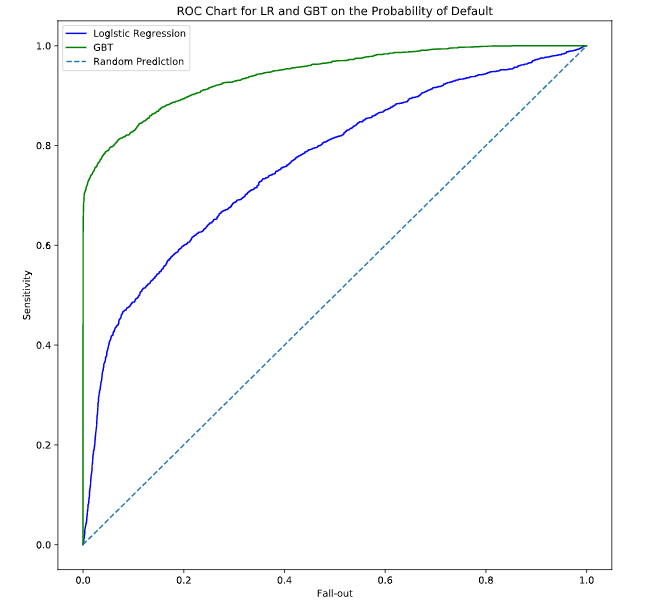

Look at the ROC curve for the gradient boosted tree. Not only is the lift much higher, the calculated AUC score is also quite a bit higher. It's beginning to look like the gradient boosted tree is best. 

#Calibration curve

You now know that the gradient boosted tree clf_gbt has the best overall performance. You need to check the calibration of the two models to see how stable the default prediction performance is across probabilities. You can use a chart of each model's calibration to check this by calling the calibration_curve() function.

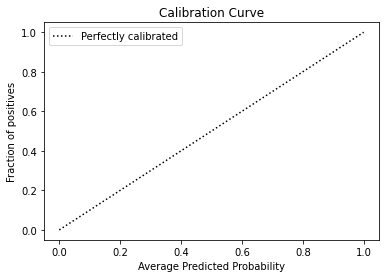

In [115]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

NameError: ignored

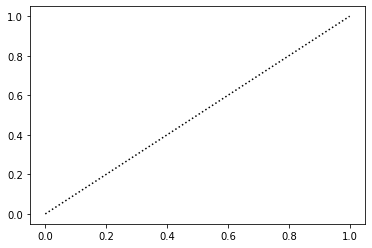

In [116]:
# Add the calibration curve for the logistic regression to the plot
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [ ]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

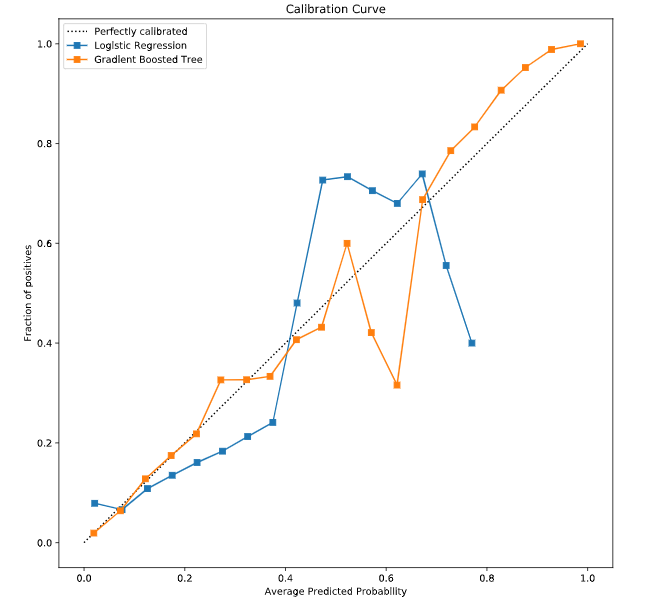

how to read this now

when avg predicted default prob was 0.6 for GBT , actual defaults in data were 0.3. So model isn't very accurate but predicting a non-default as default is still less costly.

whereas, in LR, when avg predicted default was 0.4, actual defaults in data were 0.7. This is costly

#Acceptance rate

In [117]:
print(gbt_preds)

[0 0 0 ... 1 0 1]


So assume we saved gbt2_preds as a dataframe called test_pred_df, column name = prob_default

In [118]:
test_pred_df = pd.DataFrame(gbt2_preds, columns = ['prob_default'])

The trained model clf_gbt and the data frame of it's predictions, test_pred_df, are available.

In [119]:
# Check the statistics of the probabilities of default
print(test_pred_df['prob_default'].describe())  

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

#^ very imp step above
#of all probabilities of default, that had values between 0 and 1, what value will be at 85% quantile.
#so we will create a new thereshold that will be that particular value
#and we reject prob_default above those as defaults, so atleast 85% of loans are accepted
#this is acceptance rate

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].value_counts())  #so all value counts 0 are not summed, only 1s are, so in total there are 3098 predicted defaults, or loans that will be rejected

count    3098.000000
mean        0.427372
std         0.494777
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prob_default, dtype: float64
0    3098
Name: pred_loan_status, dtype: int64


^Actually this output is just to sow, but its wrong. As test_pred_df hould have completely new test data with probailities of default, that havent been converted to 0, 1 using thresholds yet.

we used gbt_preds which has already been converted to 0,1 based on threshold =0.4.

anway, real output should look like-

<script.py> output:


    count    11784.000000
    mean         0.216866
    std          0.333038
    min          0.000354
    25%          0.022246
    50%          0.065633
    75%          0.177804
    max          0.999557
    Name: prob_default, dtype: float64
    0    10016
    1     1768
    Name: pred_loan_status, dtype: int64



    In the results of .describe() do you see how it's not until 75% that you start to see double-digit numbers? That's because the majority of our test set is non-default loans. 

In [ ]:
# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

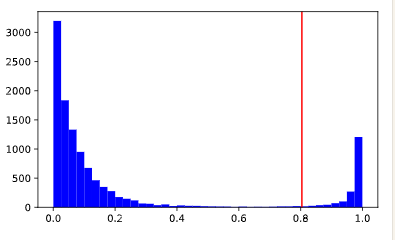


Here, you can see where the threshold is on the range of predicted probabilities. Not only can you see how many loans will be accepted (left side), but also how many loans will be rejected (right side).

#Bad rate

In [ ]:
# Print the top 5 rows of the new data frame
print(test_pred_df.head())

# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

<script.py> output:

       true_loan_status  prob_default  pred_loan_status
    0                 1      0.982387                 1
    1                 1      0.975163                 1
    2                 0      0.003474                 0
    3                 0      0.005457                 0
    4                 1      0.119876                 0
    0.08256789137380191

    This bad rate doesn't look half bad! The bad rate with the threshold set by the 85% quantile() is about 8%. This means that of all the loans we've decided to accept from the test set, only 8% were actual defaults! If we accepted all loans, the percentage of defaults would be around 22%.

In terms of money,whats the impact

In [ ]:
# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['true_loan_status'],
                 test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

<script.py> output:

    count    11784.000000
    mean      9556.283944
    std       6238.005674
    min        500.000000
    25%       5000.000000
    50%       8000.000000
    75%      12000.000000
    max      35000.000000
    Name: loan_amnt, dtype: float64
    pred_loan_status_15              0              1
    true_loan_status                                 
    0                   $87,812,693.16     $86,006.56
    1                    $7,903,046.82 $16,809,503.46

Nice! With this, we can see that our bad rate of about 8% represents an estimated loan value of about 7.9 million dollars. This may seem like a lot at first, but compare it to the total value of non-default loans! With this, we are ready to start talking about our acceptance strategy going forward.

In [120]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
preds_df
preds_df_gbt
test_pred_df
gbt_preds
preds1
log_preds_df

,prob_default,loan_status
0,0.203595,0
1,0.137401,0
2,0.119622,0
3,0.307440,0
4,0.505785,1
...,...,...
11781,0.117611,0
11782,0.478990,1
11783,0.343653,0
11784,0.040130,0


In [124]:
thresholds = []
bad_rates = []

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
  	# Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    #thresh = np.quantile(log_preds_df['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate).round(3))
    #thresholds.append(np.quantile(log_preds_df['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))
    #print(accepted_loans)

      prob_default  pred_loan_status
1                0                 0
2                0                 0
4                0                 0
5                0                 0
7                0                 0
...            ...               ...
3090             0                 0
3092             0                 0
3094             0                 0
3096             0                 0
3097             0                 0

[1774 rows x 2 columns]
      prob_default  pred_loan_status
1                0                 0
2                0                 0
4                0                 0
5                0                 0
7                0                 0
...            ...               ...
3090             0                 0
3092             0                 0
3094             0                 0
3096             0                 0
3097             0                 0

[1774 rows x 2 columns]
      prob_default  pred_loan_status
1                0       

<script.py> output:
    [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [ ]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

<script.py> output:

        Acceptance Rate  Threshold  Bad Rate
    0              1.00      1.000     0.219
    1              0.95      0.992     0.179
    2              0.90      0.976     0.132
    3              0.85      0.804     0.083
    4              0.80      0.254     0.061
    5              0.75      0.178     0.052
    6              0.70      0.138     0.043
    7              0.65      0.111     0.036
    8              0.60      0.093     0.030
    9              0.55      0.078     0.027
    10             0.50      0.066     0.023
    11             0.45      0.055     0.020
    12             0.40      0.045     0.017
    13             0.35      0.037     0.014
    14             0.30      0.030     0.010
    15             0.25      0.022     0.008
    16             0.20      0.015     0.005
    17             0.15      0.008     0.001
    18             0.10      0.004     0.000
    19             0.05      0.002     0.000

In [ ]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

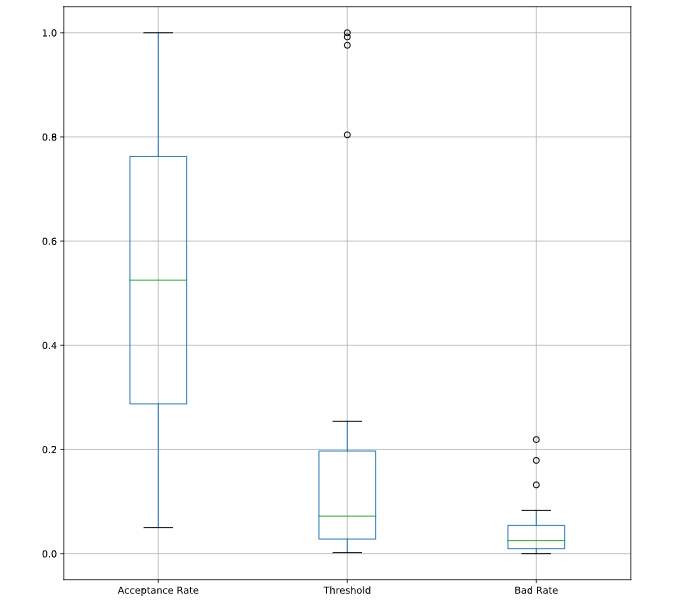

In [ ]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

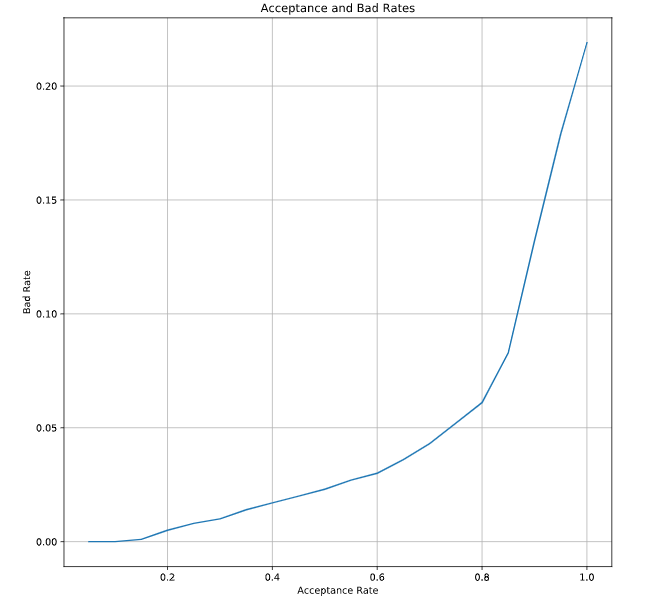

The bad rates are very low up until the acceptance rate 0.6 where they suddenly increase. This suggests that many of the accepted defaults may have a prob_default value between 0.6 and 0.8

So now we have a table like this:

In [1]:
strat_df

Out[1]:


    Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  Estimated Value

0              1.00      1.000     0.219               11379        9556.28      61112391.49

1              0.95      0.992     0.179               10591        9556.28      64977180.47

2              0.90      0.976     0.132               10025        9556.28      70510056.35

3              0.85      0.804     0.083                9390        9556.28      74837713.31

4              0.80      0.254     0.061                8857        9556.28      74313895.38

5              0.75      0.178     0.052                8229        9556.28      70460210.80
6              0.70      0.138     0.043                7685        9556.28      67124170.79
7              0.65      0.111     0.036                7104        9556.28      62999890.58
8              0.60      0.093     0.030                6456        9556.28      57993623.06
9              0.55      0.078     0.027                5870        9556.28      53066213.97
10             0.50      0.066     0.023                5288        9556.28      48209062.64
11             0.45      0.055     0.020                4726        9556.28      43356460.11
12             0.40      0.045     0.017                4131        9556.28      38134774.93
13             0.35      0.037     0.014                3536        9556.28      32844857.91
14             0.30      0.030     0.010                2941        9556.28      27542919.09
15             0.25      0.022     0.008                2359        9556.28      22182572.29
16             0.20      0.015     0.005                1768        9556.28      16726548.01
17             0.15      0.008     0.001                1187        9556.28      11320617.75
18             0.10      0.004     0.000                 576        9556.28       5504417.28
19             0.05      0.002     0.000                 405        9556.28       3870293.40

The strat_df data frame is loaded and has been enhanced already with the following columns:

Num Accepted Loans-	The number of accepted loans based on the threshold, 

Avg Loan Amnt-	The average loan amount of the entire test set,

Estimated value-	The estimated net value of non-defaults minus defaults.

In [124]:
# Print the contents of the strategy df
print(strat_df)

# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

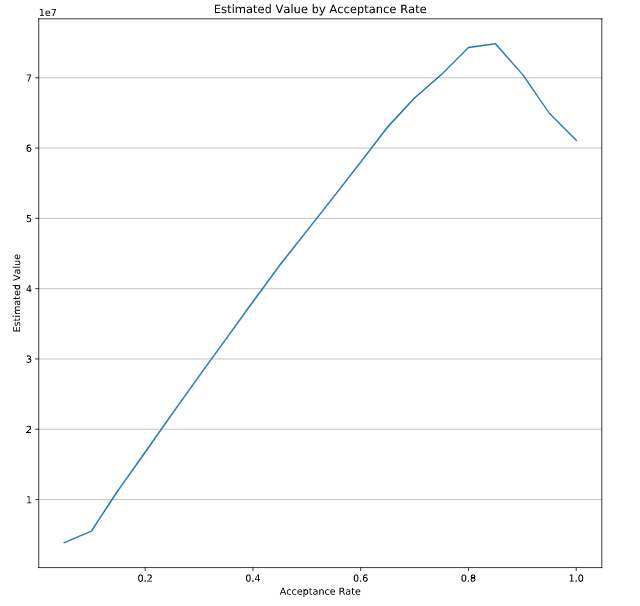

In [ ]:
# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

With our credit data and our estimated averag loan value, we clearly see that the acceptance rate 0.85 has the highest potential estimated value. Normally, the allowable bad rate is set, but we can use analyses like this to explore other options.

In [ ]:
# Print the first five rows of the data frame
print(test_pred_df.head())

# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

<script.py> output:

       true_loan_status  prob_default  loan_amnt  loss_given_default
    0                 1      0.982387      15000                 1.0
    1                 1      0.975163      11200                 1.0
    2                 0      0.003474      15000                 1.0
    3                 0      0.005457      10800                 1.0
    4                 1      0.119876       3000                 1.0

    Total expected loss:  $27,084,153.38

This is the total expected loss for the entire portfolio using the gradient boosted tree. 
27 million dollars is a lot, but the total expected loss would have been over 28 million dollars with the logistic regression. we still might have saved the company a million dollars!